In [1]:
#import matplotlib.font_manager
#del matplotlib.font_manager.weight_dict['roman']
#matplotlib.font_manager._rebuild()

In [2]:
import numpy as np
from  matplotlib import pyplot as plt
import pandas as pd
import matplotlib

#plt.rcParams['figure.figsize'] = [8, 5]
#plt.rcParams.update({'font.size': 18})
#plt.rcParams["font.weight"] = 'light'
#plt.rcParams["axes.labelweight"] = 'light'
#plt.rcParams["font.family"] = ['Times New Roman']


In [3]:
# Make figures in the paper style
%matplotlib inline
plt.rcParams['figure.dpi'] = 200
matplotlib.rcParams['axes.linewidth'] = 0.75 #set the value globally
matplotlib.rcParams['xtick.major.width'] = 0.75
matplotlib.rcParams['ytick.major.width'] = 0.75
matplotlib.rcParams['axes.labelsize'] = 7
matplotlib.rcParams['xtick.direction'] = 'in'
matplotlib.rcParams['ytick.direction'] = 'in'
matplotlib.rcParams['xtick.labelsize'] = 6
matplotlib.rcParams['ytick.labelsize'] = 6
matplotlib.rcParams['legend.fontsize'] =5
matplotlib.rcParams['pdf.fonttype']=42


matplotlib.rcParams['figure.figsize'] = (3.4908516673585166, 2.327234444905678)
matplotlib.rcParams['savefig.dpi'] = 300
matplotlib.rc('font', size= 7)
params= {'text.latex.preamble' : [r'\usepackage{amsmath}']}
plt.rcParams.update(params)

# Calculations of new physics constraints from Xe-124 decays

Since we're working on a sensitivity study for Xe124 0nu B+EC decays, we are interested in how this can complement the search for 0nuBB decay of Xe136 that nEXO will undertake. 

## Repeating the calculations in Hirsch et al. (1994)

The first thing I'll try to do, to familiarize myself with the plug-and-play calculations in some of these papers, is reproduce the plots presented in Hirsch 1994. Then I'll try to reproduce the plots presented in the Stefanik 2015 paper. 

The hope here is that I can just plug in the results of other people's calculations and get updated plots showing the complementarity of Xe124 with Xe136.

$$[\,\,T^{0\nu\beta\beta,\alpha}_{1/2}\,\,]^{-1} = C^\alpha_{mm} \left( \frac{\langle m_\nu \rangle}{m_e} \right)^2 + C^\alpha_{\eta\eta} \langle\eta\rangle^2 + C^\alpha_{\lambda\lambda} \langle\lambda\rangle^2 + C^\alpha_{m\eta}\frac{\langle m_\nu\rangle}{m_e}\langle\eta\rangle + C^\alpha_{m\lambda}\frac{\langle m_\nu\rangle}{m_e}\langle\lambda\rangle + C^\alpha_{\eta\lambda} \langle\eta\rangle\langle\lambda\rangle$$


In [4]:
# Let's start with the dictionaries of numbers.

# Nuclear matrix elements...
NME_Xe124_BpEC = {'GT':3.02, 'F':-1.35, 'GTw': 3.72, 'Fw':-1.19, 'GTq':2.82, 'Fq':-1.21, 'T':-0.67, 'P':-0.61, 'R':4.73}
NME_Xe136_BmBm = {'GT':1.120, 'F':-0.461, 'GTw':1.172, 'Fw':-0.411, 'GTq':0.480, 'Fq':-0.389, 'T':-0.482, 'P':-0.360, 'R':2.193}
NME_Ge76_BmBm = {'GT':3.014, 'F':-1.173, 'GTw':2.912, 'Fw':-1.025, 'GTq':1.945, 'Fq':-1.058, 'T':-0.612, 'P':-0.530, 'R':3.594 }

# Phase space integrals
PS_Xe136 = [1.462e14,3.679e14,9.047e15,3.099e15,4.015e13,2.275e12,1.812e10,1.657e11,4.956e10,1.165e14,3.238e15]
PS_Ge76 = [0.237e14,0.391e14,1.305e15,0.470e15,0.566e13,0.531e12,0.270e10,0.149e11,1.223e10,0.141e14,0.476e15]
PS_Xe124 = [5.781e-17,104.1e-17,38.11e-17,0.4553e-17,211.6e-17,1183e-17,5.463e-13,4.887e-14,1.527e-12,2.395e-17]

print(len(PS_Xe136))
print(len(PS_Xe124))


1+0.461



11
10


1.461

In [5]:
df_nme = pd.read_csv('Double beta matrix elements - Matrix elements.csv',index_col=0,nrows=13)
df_psf = pd.read_csv('Double beta matrix elements - Phase space factors.csv',nrows=11)
df_sf = pd.read_csv('Double beta matrix elements - Sign factors.csv',index_col=0)


df_nme.head(n=20)


,Xe124 Mixed,Xe124 B+B+,Xe136,Ge76
Matrix element,,,,
GT,3.920000,NaN,1.12000,3.104000
F,-1.350000,NaN,-0.46144,-1.207456
T,-0.670000,NaN,NaN,NaN
GTw,3.720000,NaN,NaN,NaN
Fw,-1.190000,NaN,NaN,NaN
GTq,2.820000,NaN,NaN,NaN
Fq,-1.210000,NaN,NaN,NaN
P,-0.610000,NaN,-0.35952,-0.546304
R,4.730000,NaN,2.19296,3.699968


In [6]:
df_psf.head(n=20)

,Factor,Xe124 Mixed,Xe124 B+B+,Xe136,Ge76,Xe136.1
0,G01,5.780000e-17,3.120000e-18,4.900000e-14,2.370000e-15,1.460000e-14
1,G02,1.040000e-15,4.400000e-19,1.260000e-13,3.910000e-15,3.680000e-14
2,G03,3.810000e-16,3.740000e-19,3.020000e-14,1.310000e-15,9.050000e-15
3,G04,4.550000e-18,5.030000e-19,1.000000e-14,4.700000e-16,3.100000e-15
4,G05,2.120000e-15,-1.600000e-16,1.610000e-12,5.660000e-14,4.020000e-13
5,G06,1.180000e-14,8.560000e-16,7.540000e-12,5.310000e-14,2.280000e-12
6,G07,5.460000e-13,-4.890000e-14,7.280000e-10,2.700000e-11,1.810000e-10
7,G08,4.890000e-14,4.520000e-15,8.000000e-11,1.490000e-12,1.660000e-11
8,G09,1.530000e-12,1.320000e-13,1.660000e-09,1.220000e-10,4.960000e-10
9,G10,2.400000e-17,1.710000e-18,7.890000e-15,1.410000e-15,1.170000e-14


In [7]:
print(df_psf['Ge76']/df_psf['Xe136'])

0     0.048367
1     0.031032
2     0.043377
3     0.047000
4     0.035155
5     0.007042
6     0.037088
7     0.018625
8     0.073494
9     0.178707
10         NaN
dtype: float64


In [8]:

# Convert the phase space factors to numpy arrays, as they can be indexed by numbers.
xe124_psf = df_psf['Xe124 Mixed'].values
xe136_psf = df_psf['Xe136'].values
ge76_psf = df_psf['Ge76'].values*3.3

# Convert the nuclear matrix elements to dicts, so they can be indexed by labels
xe124_nme = df_nme['Xe124 Mixed'].astype(float).to_dict()
xe136_nme = df_nme['Xe136'].astype(float).to_dict()
ge76_nme = df_nme['Ge76'].astype(float).to_dict()

# Convert the constant factors to dicts, so they can be indexed by labels.
xe124_sf = df_sf['Xe124 mixed'].to_dict()
xe136_sf = df_sf['Xe136'].to_dict()
ge76_sf = df_sf['Ge76'].to_dict()

print(df_nme['Xe124 Mixed'].loc['GT'])
print(xe124_nme)

3.92
{'GT': 3.92, 'F': -1.35, 'T': -0.67, 'GTw': 3.72, 'Fw': -1.19, 'GTq': 2.82, 'Fq': -1.21, 'P': -0.61, 'R': 4.73, '1+': 3.21, '1-': 10.47, '2+': 1.3666666669999998, '2-': 4.553333333}


### Define the coefficients as functions acting on the matrix elements (M), phase space factors (G), and the decay type factors (F). 

These definitions follow those given in Hirsch 1994, which (I think) copies them straight from Doi 1993.

In [9]:
def Cmm(M,G,F):
    return (M['GT'] - M['F'])**2*G[0]
    
def Cnn(M,G,F):
    return M['2+']**2*G[1] - \
    1./9.*F['fe']*( 2*F['Se']*M['1-']*M['2+']*G[2] - M['1-']**2*G[3] ) -\
    F['Se']*M['P']*M['R']*G[6] + M['P']**2*G[7] + M['R']**2*G[8]
    
def Cll(M,G,F):
    return M['2-']**2*G[1] - \
    1./9.*F['fe']*( 2*F['Se']*M['1+']*M['2-']*G[2] - M['1+']**2*G[3] )

def Cml(M,G,F):
    return (M['GT'] - M['F'])*\
            ( -F['Se']*M['2-']*G[2] + M['1+']*G[3] )

def Cnl(M,G,F):
    return -2*( M['2+']*M['2-']*G[1] - \
               1./9.*F['fe']*( F['Se']*( M['1+']*M['2+'] + M['1-']*M['2-'] )*G[2] - M['1+']*M['1-']*G[3] ) )

def Cmn(M,G,F):
    return (M['GT']-M['F'])* \
            ( F['Se']*M['2+']*G[2] - M['1-']*G[3] - F['Sb']*( M['P']*G[4] - F['Se']*M['R']*G[5] ) )

In [10]:
def PrintCoeffs(M,G,F):
    print('Cmm: {:1.2E}'.format(Cmm(M,G,F)))
    print('Cmn: {:1.2E}'.format(Cmn(M,G,F)))
    print('Cml: {:1.2E}'.format(Cml(M,G,F)))
    print('Cnn: {:1.2E}'.format(Cnn(M,G,F)))
    print('Cll: {:1.2E}'.format(Cll(M,G,F)))
    print('Cnl: {:1.2E}'.format(Cnl(M,G,F)))
    return np.array([Cmm(M,G,F),Cmn(M,G,F),Cml(M,G,F),Cnn(M,G,F),Cll(M,G,F),Cnl(M,G,F)])







### Cross-checking with tables given in Hirsch94

We can print the coefficients for the Xe124 case, and check that they match with Table 3b in Hirsch 1994. Indeed they do!

In [11]:
xe124_coeffs = PrintCoeffs(xe124_nme,xe124_psf,xe124_sf)
xe136_coeffs = PrintCoeffs(xe136_nme,xe136_psf,xe136_sf)
ge76_coeffs = PrintCoeffs(ge76_nme,ge76_psf,ge76_sf)

for i in range(0,6):
    print('{:1.2E}\t{:1.2E}\t{:1.2E}'.format(xe124_coeffs[i],xe136_coeffs[i],ge76_coeffs[i]))

Cmm: 1.61E-15
Cmn: 2.84E-13
Cml: 9.22E-15
Cnn: 3.27E-11
Cll: 2.20E-14
Cnl: -1.45E-14
Cmm: 1.23E-13
Cmn: 2.70E-11
Cml: -2.90E-14
Cnn: 8.57E-09
Cll: 2.11E-13
Cnl: -6.42E-14
Cmm: 1.45E-13
Cmn: 3.19E-12
Cml: -5.35E-14
Cnn: 5.69E-09
Cll: 1.76E-13
Cnl: -6.41E-14
1.61E-15	1.23E-13	1.45E-13
2.84E-13	2.70E-11	3.19E-12
9.22E-15	-2.90E-14	-5.35E-14
3.27E-11	8.57E-09	5.69E-09
2.20E-14	2.11E-13	1.76E-13
-1.45E-14	-6.42E-14	-6.41E-14


Now let's try and reproduce the calculated value of the half lives in Table 5.

In [12]:
# Define the formula for the inverse half life
def InvT(m,n,l,M,G,F):
    return Cmm(M,G,F)*(m/511000.)**2 + Cnn(M,G,F)*n**2 + Cll(M,G,F)*l**2 + \
            Cnl(M,G,F)*n*l + Cml(M,G,F)*(m/511000.)*l + Cmn(M,G,F)*(m/511000.)*n


In [13]:
print('Half life (T_1/2): {:1.2E}'.format(1./InvT(1.,0.,0.,xe124_nme,xe124_psf,xe124_sf)))

Half life (T_1/2): 1.63E+26


In [14]:
def LambdaVsMN_pos(m,n,T,M,G,F):
    A = Cll(M,G,F)
    B = Cml(M,G,F)*(m/511000.) + Cnl(M,G,F)*n
    C = Cmm(M,G,F)*(m/511000.)**2 + Cnn(M,G,F)*n**2 + Cmn(M,G,F)*(m/511000.)*n - 1./T
    return (-B + np.sqrt(B**2 - 4.*A*C)) / (2*A)

def LambdaVsMN_neg(m,n,T,M,G,F):
    A = Cll(M,G,F)
    B = Cml(M,G,F)*(m/511000.) + Cnl(M,G,F)*n
    C = Cmm(M,G,F)*(m/511000.)**2 + Cnn(M,G,F)*n**2 + Cmn(M,G,F)*(m/511000.)*n - 1./T
    return (-B - np.sqrt(B**2 - 4.*A*C)) / (2*A)

def EtaVsML_pos(m,l,T,M,G,F):
    A = Cnn(M,G,F)
    B = Cmn(M,G,F)*(m/511000.) + Cnl(M,G,F)*l
    C = Cmm(M,G,F)*(m/511000.)**2 + Cll(M,G,F)*l**2 + Cml(M,G,F)*(m/511000.)*l - 1./T
    return (-B + np.sqrt(B**2 - 4.*A*C)) / (2*A)

def EtaVsML_neg(m,l,T,M,G,F):
    A = Cnn(M,G,F)
    B = Cmn(M,G,F)*(m/511000.) + Cnl(M,G,F)*l
    C = Cmm(M,G,F)*(m/511000.)**2 + Cll(M,G,F)*l**2 + Cml(M,G,F)*(m/511000.)*l - 1./T
    return (-B - np.sqrt(B**2 - 4.*A*C)) / (2*A)

/nustorage/local/anaconda/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in sqrt
  """
/nustorage/local/anaconda/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in sqrt
  # This is added back by InteractiveShellApp.init_path()


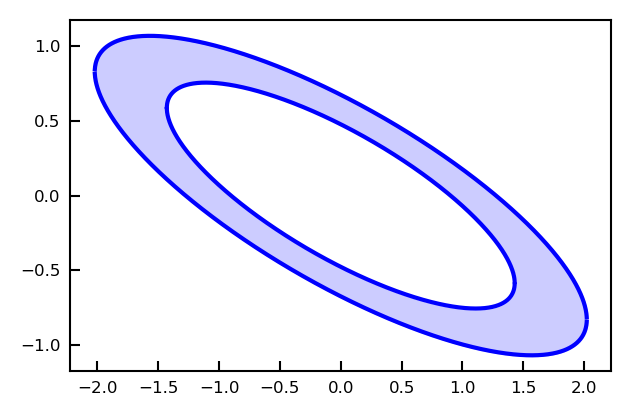

In [15]:
m = np.linspace(-3.,3.,10000)

lp_lo = LambdaVsMN_pos(m,0.,1.e26,xe124_nme,xe124_psf,xe124_sf)
lp_hi = LambdaVsMN_pos(m,0.,2.e26,xe124_nme,xe124_psf,xe124_sf)
lm_lo = LambdaVsMN_neg(m,0.,1.e26,xe124_nme,xe124_psf,xe124_sf)
lm_hi = LambdaVsMN_neg(m,0.,2.e26,xe124_nme,xe124_psf,xe124_sf)
#print(l)

plt.fill_between(m,lp_lo*1.e6,lm_lo*1.e6,color=(0.,0.,1.,0.2))
plt.fill_between(m,lp_hi*1.e6,lm_hi*1.e6,color=(1.,1.,1.,1.))

plt.plot(m,lm_lo*1.e6,'-b')
plt.plot(m,lm_hi*1.e6,'-b')
plt.plot(m,lp_lo*1.e6,'-b')
plt.plot(m,lp_hi*1.e6,'-b')



All the checks match what's in Hirsch94. So I think all the formulae are implemented correctly. Now let's explore what this means from the physics point of view.





## Calculating constraints based on a detection in nEXO.

According to the sensitivity paper, nEXO can make a 3-sigma discovery (with 50% probability) if the half life is 5.7$\times$10$^{27}$ yrs. Let's assume nEXO has made such a discovery, and proceed from there. We'll assume (arbitrarily) a 30% uncertainty, so $(5.7\pm1.7)\,\times\,10^{27}$yrs.

/nustorage/local/anaconda/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in sqrt
  """
/nustorage/local/anaconda/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in sqrt
  # This is added back by InteractiveShellApp.init_path()


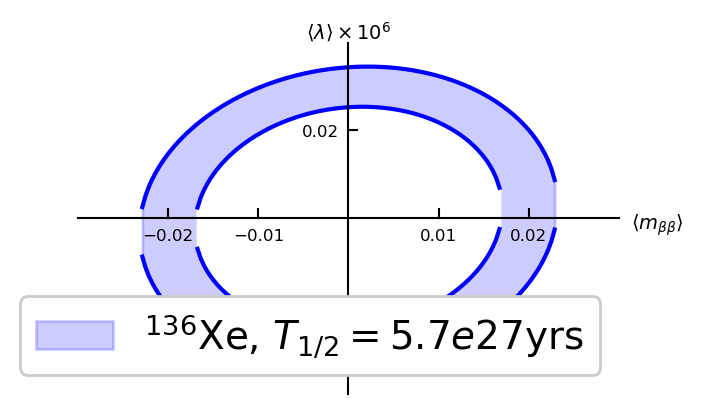

In [16]:
#plt.rcParams["text.usetex"] = True
#plt.rcParams['text.latex.unicode']=False

T_hi = (5.7+1.7)*1.e27
T_lo = (5.7-1.7)*1.e27

#T_lo = 5.6e25

m = np.linspace(-1.8,1.8,10000)

lp_lo = LambdaVsMN_pos(m,0.,T_lo,xe136_nme,xe136_psf,xe136_sf)
lp_hi = LambdaVsMN_pos(m,0.,T_hi,xe136_nme,xe136_psf,xe136_sf)
lm_lo = LambdaVsMN_neg(m,0.,T_lo,xe136_nme,xe136_psf,xe136_sf)
lm_hi = LambdaVsMN_neg(m,0.,T_hi,xe136_nme,xe136_psf,xe136_sf)

plt.fill_between(m,lp_lo*1.e6,lm_lo*1.e6,color=(0.,0.,1.,0.2),label='$^{136}$Xe, $T_{1/2}=5.7e27$yrs')
plt.fill_between(m,lp_hi*1.e6,lm_hi*1.e6,color=(1.,1.,1.,1.))

plt.plot(m,lm_lo*1.e6,'-b')
plt.plot(m,lm_hi*1.e6,'-b')
plt.plot(m,lp_lo*1.e6,'-b')
plt.plot(m,lp_hi*1.e6,'-b')

ax = plt.gca()
ax.spines['bottom'].set_position('zero')
ax.spines['left'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
ax.set_xticks([-0.02,-0.01,0.01,0.02])
ax.set_yticks([-0.02,0.02])

ax.set_xlabel(r'$\langle m_{\beta\beta} \rangle$')
ax.xaxis.set_label_coords(1.07,0.52)
ax.set_ylabel(r'$\langle \lambda \rangle \times 10^6$',rotation='horizontal')
ax.yaxis.set_label_coords(0.5,1.0)
plt.axis([-0.03,0.03,-0.04,0.04])
plt.legend(loc='lower right',frameon=True,fontsize=14,framealpha=1.)



plt.savefig('test_nexo_sensitivity_ml_plane.png',dpi=300,bbox_inches='tight')

For the $^{124}$Xe case, we'll make the following assumptions:
- No background
- 50kg of $^{124}$Xe
- 10yr livetime
- 100% efficiency

Assuming the standard 2.3cts $\rightarrow$ 90% confidence interval relationship, what is the constraint from such a search?

In [17]:
# Make efficiency a variable, so we can change it
eff = 1.
livetime = 10. #yrs
N_Xe = 50.e3 / 124. * 6.02e23 # Number of xenon atoms
#N_Xe = 1000.e3 / 78. * 6.02e23 # Number of xenon atoms

Tlim = eff*N_Xe*livetime*np.log(2)/2.3

print('Best half-life limit is {}'.format(Tlim))


Best half-life limit is 7.315473399317796e+26


In [18]:
# However, the result of Alex's calculations are slightly worse, he gets:
Tlim = 2.88e26
#Tlim = Tlim/2.
TKamland = 1.07e26

In [19]:
def ScaleNMEs( nme_dict, factor ):
    new_nme_dict = {}
    for key in nme_dict.keys():
        new_nme_dict[key] = nme_dict[key]*factor
    return new_nme_dict

In [20]:
print(xe124_nme)
xe124_nme_hi = ScaleNMEs(xe124_nme,8./4.)
xe124_nme_lo = ScaleNMEs(xe124_nme,2./4.)



{'GT': 3.92, 'F': -1.35, 'T': -0.67, 'GTw': 3.72, 'Fw': -1.19, 'GTq': 2.82, 'Fq': -1.21, 'P': -0.61, 'R': 4.73, '1+': 3.21, '1-': 10.47, '2+': 1.3666666669999998, '2-': 4.553333333}


In [21]:
xe124_lm_hi = LambdaVsMN_neg(m,0.,Tlim,xe124_nme_hi,xe124_psf,xe124_sf)
xe124_lm_lo = LambdaVsMN_neg(m,0.,Tlim,xe124_nme_lo,xe124_psf,xe124_sf)
xe124_lp_hi = LambdaVsMN_pos(m,0.,Tlim,xe124_nme_hi,xe124_psf,xe124_sf)
xe124_lp_lo = LambdaVsMN_pos(m,0.,Tlim,xe124_nme_lo,xe124_psf,xe124_sf)
xe124_lp = LambdaVsMN_pos(m,0.,Tlim,xe124_nme,xe124_psf,xe124_sf)
xe124_lm = LambdaVsMN_neg(m,0.,Tlim,xe124_nme,xe124_psf,xe124_sf)


xe136_lp = LambdaVsMN_pos(m,0.,TKamland,xe136_nme,xe136_psf,xe136_sf)
xe136_lm = LambdaVsMN_neg(m,0.,TKamland,xe136_nme,xe136_psf,xe136_sf)


/nustorage/local/anaconda/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in sqrt
  # This is added back by InteractiveShellApp.init_path()
/nustorage/local/anaconda/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in sqrt
  """


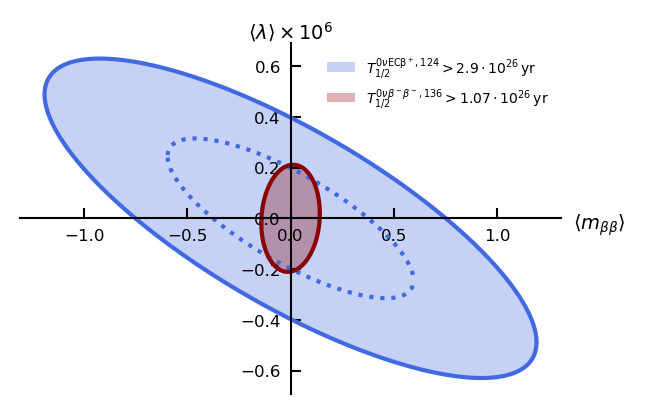

In [47]:
plt.fill_between(m,xe124_lp*1.e6,xe124_lm*1.e6,facecolor='royalblue',alpha=0.3, 
                 edgecolor=None,label='$T^{0\\nu\\rm{EC}\\beta^+,124}_{1/2}>2.9\\cdot10^{26}\\,\\rm{yr}$')
#plt.fill_between(m,xe124_lp_hi*1.e6,xe124_lm_hi*1.e6,color=(0.8,0.8,1.,1.),label='$^{136}$Xe, $T_{1/2}>1.07e26$yrs')

#plt.fill_between(m,lp_hi*1.e6,lm_hi*1.e6,color=(1.,1.,1.,1.))

plt.plot(m,xe124_lm*1.e6,linestyle='-', color='royalblue', linewidth=1.5)
plt.plot(m,xe124_lm_hi*1.e6,linestyle=':', color='royalblue')
plt.plot(m,xe124_lp_hi*1.e6,linestyle=':', color='royalblue')
#plt.plot(m,lm_hi*1.e6,'-b')
plt.plot(m,xe124_lp*1.e6,linestyle='-', color='royalblue', linewidth=1.5)
#plt.plot(m,lp_hi*1.e6,'-b')


plt.fill_between(m,xe136_lm*1.e6,xe136_lp*1.e6,facecolor='darkred',alpha=0.3, edgecolor=None,label='$T^{0\\nu\\beta^-\\beta^-,136}_{1/2}>1.07\\cdot10^{26}\\,\\rm{yr}$')
plt.plot(m,xe136_lm*1.e6,linestyle='-', color='darkred', linewidth=1.5)
plt.plot(m,xe136_lp*1.e6,linestyle='-', color='darkred', linewidth=1.5)

ax = plt.gca()
ax.spines['bottom'].set_position('zero')
ax.spines['left'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
#ax.set_xticks([-0.02,-0.01,0.01,0.02])
#ax.set_yticks([-0.02,0.02])
#ax.set_xlim(-1.2,1.2)
#ax.set_ylim(-0.7,0.7)

ax.set_xlabel(r'$\langle m_{\beta\beta} \rangle$')
ax.xaxis.set_label_coords(1.07,0.52)
ax.set_ylabel(r'$\langle \lambda \rangle \times 10^6$',rotation='horizontal')
ax.yaxis.set_label_coords(0.5,1.0)
#plt.axis([-0.03,0.03,-0.04,0.04])
plt.legend(loc='upper right',frameon=False,framealpha=1.)

plt.draw()
plt.savefig('ellipses_plot_efficiencies_included.pdf',dpi=300,bbox_inches='tight')
plt.show()
#plt.savefig('ellipses_plot_efficiencies_included.svg',bbox_inches='tight')



In [67]:
xe124_lm = EtaVsML_neg(m,0.,Tlim,xe124_nme,xe124_psf,xe124_sf)
xe124_lp = EtaVsML_pos(m,0.,Tlim,xe124_nme,xe124_psf,xe124_sf)

xe136_lp = EtaVsML_pos(m,0.,TKamland,xe136_nme,xe136_psf,xe136_sf)
xe136_lm = EtaVsML_neg(m,0.,TKamland,xe136_nme,xe136_psf,xe136_sf)


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in sqrt
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in sqrt


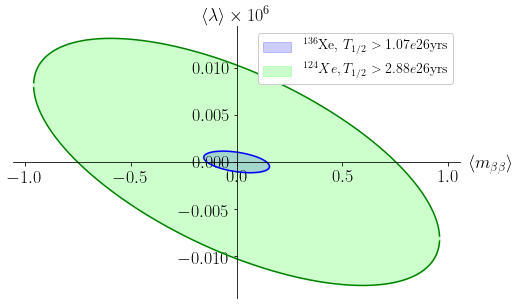

In [48]:
plt.fill_between(m,xe136_lp*1.e6,xe136_lm*1.e6,color=(0.,0.,1.,0.2),label='$^{136}$Xe, $T_{1/2}>1.07e26$yrs')
#plt.fill_between(m,lp_hi*1.e6,lm_hi*1.e6,color=(1.,1.,1.,1.))

plt.plot(m,xe136_lm*1.e6,'-b')
#plt.plot(m,lm_hi*1.e6,'-b')
plt.plot(m,xe136_lp*1.e6,'-b')
#plt.plot(m,lp_hi*1.e6,'-b')


plt.fill_between(m,xe124_lm*1.e6,xe124_lp*1.e6,color=(0.,1.,0.,0.2),label='$^{124}Xe, T_{1/2}>2.88e26$yrs')
plt.plot(m,xe124_lm*1.e6,linstyle='-', color='royalblue')
plt.plot(m,xe124_lp*1.e6,linstyle='-', color='royalblue')

ax = plt.gca()
ax.spines['bottom'].set_position('zero')
ax.spines['left'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
#ax.set_xticks([-0.02,-0.01,0.01,0.02])
#ax.set_yticks([-0.02,0.02])

ax.set_xlabel(r'$\langle m_{\beta\beta} \rangle$')
ax.xaxis.set_label_coords(1.07,0.52)
ax.set_ylabel(r'$\langle \lambda \rangle \times 10^6$',rotation='horizontal')
ax.yaxis.set_label_coords(0.5,1.0)
#plt.axis([-0.03,0.03,-0.04,0.04])
plt.legend(loc='upper right',frameon=True,fontsize=14,framealpha=1.)
plt.savefig('ellipses_plot_efficiencies_included.png',dpi=500,bbox_inches='tight')

## Next, let's assume we have a positive measurement in XENONnT or LZ

We'll assume we have 5kg of $^{124}$Xe in XENONnT or LZ, and calculate the necessary halflife for a ~3sigma detection. Then, we'll see what sort of new constraints this can apply on the physical parameters, given the limits on Xe136 and Ge76 from Gerda/Kamland-Zen.

In [26]:
from scipy.stats import poisson

x = np.arange(0.,20.)

bins_mean1 = poisson.pmf(x,1.)


for i in range(0,len(bins_mean1)):
    if bins_mean1[i] > 0.005:
        print('{:1}\t{:1.3E}'.format(x[i],bins_mean1[i]))
    
# We conclude that we need 5 events for a 3-sigma detection (<0.5% probability), 
# if the expectation is 1 background event.

0.0	3.679E-01
1.0	3.679E-01
2.0	1.839E-01
3.0	6.131E-02
4.0	1.533E-02


In [27]:
# If we saw 5 events in LZ or XENONnT, what halflife would that correspond to?

eff = 1.
livetime = 10. #yrs
mass_Xe = 5.e3 #g
N_Xe = mass_Xe / 124. * 6.02e23 # Number of xenon atoms

Tmeas = eff*N_Xe*livetime*np.log(2)/5.
print('Halflife for 3-sigma detection: {:1.3E} +/- {:1.3E}'.format(Tmeas,Tmeas/2.))
Terr = Tmeas/2.

Halflife for 3-sigma detection: 3.365E+25 +/- 1.683E+25


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in sqrt
  """
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in sqrt
  # This is added back by InteractiveShellApp.init_path()


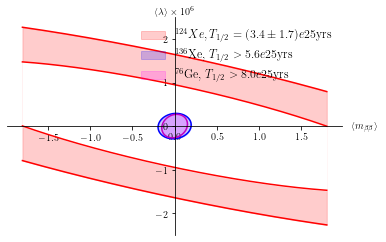

In [28]:
xe124_lp_lo = LambdaVsMN_pos(m,0.,Tmeas-Terr,xe124_nme,xe124_psf,xe124_sf)
xe124_lp_hi = LambdaVsMN_pos(m,0.,Tmeas+Terr,xe124_nme,xe124_psf,xe124_sf)
xe124_lm_lo = LambdaVsMN_neg(m,0.,Tmeas-Terr,xe124_nme,xe124_psf,xe124_sf)
xe124_lm_hi = LambdaVsMN_neg(m,0.,Tmeas+Terr,xe124_nme,xe124_psf,xe124_sf)


lp_lo = LambdaVsMN_pos(m,0.,5.6e25,xe136_nme,xe136_psf,xe136_sf)
#lp_hi = LambdaVsMN_pos(m,0.,T_hi,xe136_nme,xe136_psf,xe136_sf)
lm_lo = LambdaVsMN_neg(m,0.,5.6e25,xe136_nme,xe136_psf,xe136_sf)
#lm_hi = LambdaVsMN_neg(m,0.,T_hi,xe136_nme,xe136_psf,xe136_sf)

ge76_lp_lo = LambdaVsMN_pos(m,0.,8.e25,ge76_nme,ge76_psf,ge76_sf)
ge76_lm_lo = LambdaVsMN_neg(m,0.,8.e25,ge76_nme,ge76_psf,ge76_sf)


plt.fill_between(m,xe124_lm_lo*1.e6,xe124_lp_lo*1.e6,color=(1.,0.,0.,0.2),label='$^{124}Xe, T_{1/2}=(3.4\pm1.7)e25$yrs')
plt.fill_between(m,xe124_lp_hi*1.e6,xe124_lm_hi*1.e6,color=(1.,1.,1.,1.))

plt.plot(m,xe124_lm_lo*1.e6,'-r')
plt.plot(m,xe124_lp_lo*1.e6,'-r')
plt.plot(m,xe124_lm_hi*1.e6,'-r')
plt.plot(m,xe124_lp_hi*1.e6,'-r')

plt.fill_between(m,lp_lo*1.e6,lm_lo*1.e6,color=(0.,0.,1.,0.2),label='$^{136}$Xe, $T_{1/2}>5.6e25$yrs')
#plt.fill_between(m,lp_hi*1.e6,lm_hi*1.e6,color=(1.,1.,1.,1.))
plt.fill_between(m,ge76_lp_lo*1.e6,ge76_lm_lo*1.e6,color=(1.,0.,1.,0.2),label='$^{76}$Ge, $T_{1/2}>8.0e25$yrs')


plt.plot(m,lm_lo*1.e6,'-b')
#plt.plot(m,lm_hi*1.e6,'-b')
plt.plot(m,lp_lo*1.e6,'-b')
#plt.plot(m,lp_hi*1.e6,'-b')

plt.plot(m,ge76_lm_lo*1.e6,'-m')
plt.plot(m,ge76_lp_lo*1.e6,'-m')

ax = plt.gca()
ax.spines['bottom'].set_position('zero')
ax.spines['left'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
#ax.set_xticks([-0.02,-0.01,0.01,0.02])
#ax.set_yticks([-0.02,0.02])

ax.set_xlabel(r'$\langle m_{\beta\beta} \rangle$')
ax.xaxis.set_label_coords(1.07,0.52)
ax.set_ylabel(r'$\langle \lambda \rangle \times 10^6$',rotation='horizontal')
ax.yaxis.set_label_coords(0.5,1.0)
#plt.axis([-0.03,0.03,-0.04,0.04])
plt.legend(loc='upper right',frameon=False,fontsize=12,framealpha=1.)

plt.savefig('current_Ge76_Xe136_limits_plus_50kgXe124_w_3sig_detection.png',dpi=500,bbox_inches='tight')


### 